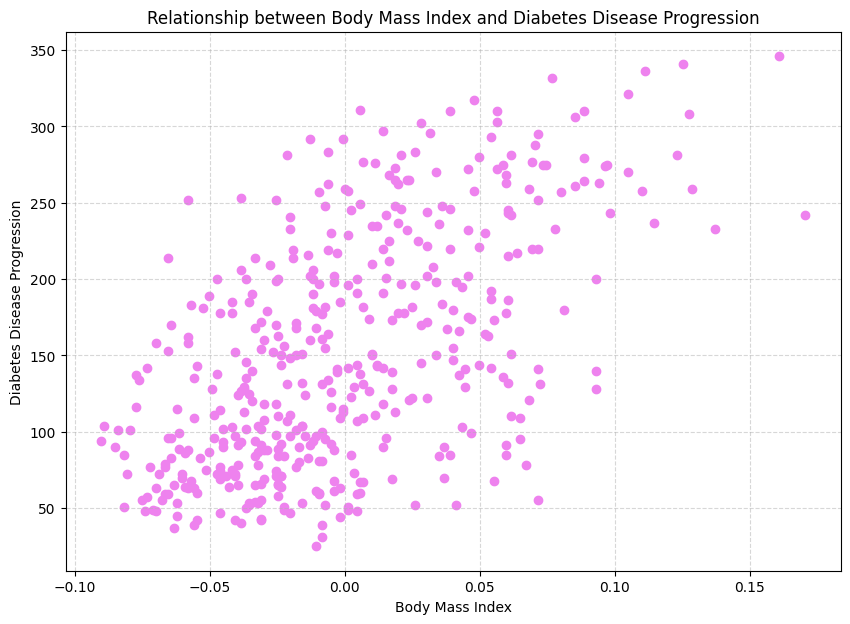

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#loading in the dataset
from sklearn import datasets
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)


plt.figure(figsize=(13, 7))
plt.scatter(diabetes_X[:, 2], diabetes_y, color='violet')
plt.xlabel('Body Mass Index')
plt.ylabel('Diabetes Disease Progression')
plt.title('Relationship between Body Mass Index and Diabetes Disease Progression')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [23]:
bmi_index = 2
X_bmi = diabetes_X[:, np.newaxis, bmi_index]  # It's necessary to extract BMI feature as a 2D array
y = diabetes_y  

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_bmi, y, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (353, 1)
Shape of X_test: (89, 1)
Shape of y_train: (353,)
Shape of y_test: (89,)


In [22]:
#create and train the model using the training sets
r_model = LinearRegression()
r_model.fit(X_train, y_train)

slope = r_model.coef_[0]
intercept = r_model.intercept_
print(f"Slope (Coefficient): {slope}")
print(f"Intercept: {intercept}")

#making predictions using the training set
predict_y_train = r_model.predict(X_train)

# Make predictions using the test set
predict_y_test  = r_model.predict(X_test)
print("Predictions testing set:\n", predict_y_test)



Slope (Coefficient): 998.5776891375593
Intercept: 152.00335421448167
Predictions testing set:
 [145.80622687 188.85739048 147.95878505 203.92529774 131.8145987
 127.50948234 322.31599764 197.4676232   61.85645785 167.33180868
 118.89924962  94.14483055  90.91599328 166.25552959  96.29738873
 157.64529687 223.29832136 240.5187868  180.24715776 210.38297228
 191.00994866 109.21273781 102.75506327 174.86576231 196.39134411
 166.25552959 211.45925137 133.96715688  78.0006442  130.73831961
 244.82390316 114.59413326 166.25552959 145.80622687 192.08622775
 229.7559959  121.0518078  118.89924962 121.0518078   94.14483055
  82.30576056 122.12808689 129.66204052 118.89924962 107.06017963
 116.74669144 115.67041235 101.67878418  67.2378533  153.34018051
 210.38297228  82.30576056 169.48436686 111.36529599 133.96715688
 216.84064682 105.98390054 213.61180955 133.96715688  97.37366782
 182.39971594 193.16250684 206.07785592 107.06017963  86.61087692
 170.56064595 140.42483142 127.50948234 117.8229

The slope indicates a strong relationship between BMI and the diabetes disease progression

Mean squared error of train set:, 3854.11265207582
Mean squared error of test set:, 4061.8259284949268


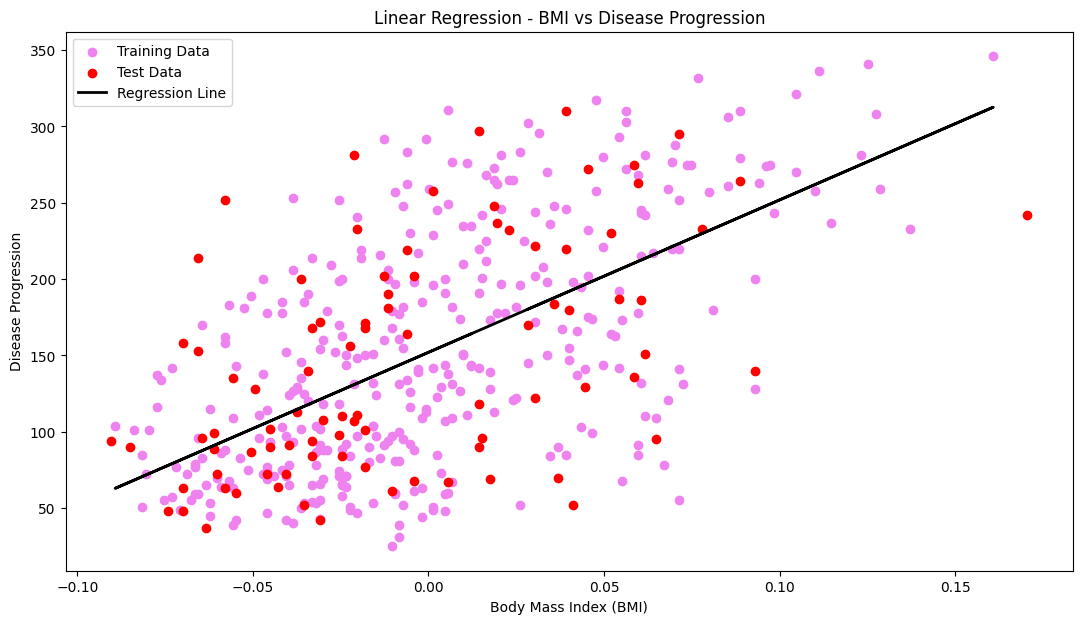

In [24]:
# Calculate mean squared error of train set
mse_train = mean_squared_error(y_train, predict_y_train)
print(f"Mean squared error of train set:, {mse_train}")

# Calculate mean squared error of test set
mse_test = mean_squared_error(y_test, predict_y_test)
print(f"Mean squared error of test set:, {mse_test}")

#Plot the  training data and the test data model
plt.figure(figsize=(13, 7))
plt.scatter(X_train, y_train, color='violet', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.plot(X_train, predict_y_train, color='black', linewidth=2, label='Regression Line')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Disease Progression')
plt.title('Linear Regression - BMI vs Disease Progression')
plt.legend()
plt.show()

The model appears to be a decent fit with the testing data points.